In [ ]:
!pip install  tflite-model-maker
!pip install  pycocotools

In [ ]:
import numpy as np
import os
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
import tensorflow as tf

In [ ]:
#save final weights to google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lfDO94JkXbo8aZZzOHky")
project = rf.workspace("fruits-lggth").project("fruits_yolov5")
dataset = project.version(6).download("voc")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 919 kB/s 
     |████████████████████████████████| 67 kB 6.6 MB/s 
     |████████████████████████████████| 138 kB 36.1 MB/s 
     |████████████████████████████████| 54 kB 3.8 MB/s 
     |████████████████████████████████| 145 kB 68.3 MB/s 
     |████████████████████████████████| 178 kB 64.2 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=1586c0c8d0773a8d59530c8176162606d8e59fd44b097a80e507fe10d3f1e9f8
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: certifi
    Found existing installation: certi

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Fruits_yolov5-6 in voc:: 100%|██████████| 5707/5707 [00:01<00:00, 2979.13it/s]


In [ ]:
# Paths pointing to training and validation data respectively. Images and xml annotations are in the same location
tr_image_dir= '/content/Fruits_yolov5-6/train'
tr_image_annotations= '/content/Fruits_yolov5-6/train'
val_image_dir='/content/Fruits_yolov5-6/valid'
test_image_dir= '/content/Fruits_yolov5-6/test'

label_map={1:'apple', 2:'apricot',3:'banana',4:'grapefruit',5:'lemon',6:'mango',7:'melon',8:'orange',9:'pear',10:'persimmone',11:'pineapple',12:'plum',13:'pomegranade',14:'watermelon'}
print(label_map)

# Load data. Data is loaded as tfrecord and stored in the cache_dir location, for fast future use. 
train_ds = object_detector.DataLoader.from_pascal_voc(images_dir=tr_image_dir,
                                                      annotations_dir= tr_image_dir,
                                                      label_map=label_map
                                                     )
# Load validation subset.
val_ds = object_detector.DataLoader.from_pascal_voc(images_dir=val_image_dir,
                                                      annotations_dir= val_image_dir,
                                                      label_map=label_map,
                                                     )
# Load validation subset.
test_ds = object_detector.DataLoader.from_pascal_voc(images_dir=test_image_dir,
                                                      annotations_dir= test_image_dir,
                                                      label_map=label_map,
                                                     )

print("Train dataset contains {} images".format(train_ds.__len__()))

{1: 'apple', 2: 'apricot', 3: 'banana', 4: 'grapefruit', 5: 'lemon', 6: 'mango', 7: 'melon', 8: 'orange', 9: 'pear', 10: 'persimmone', 11: 'pineapple', 12: 'plum', 13: 'pomegranade', 14: 'watermelon'}
Train dataset contains 1996 images


In [ ]:
spec = model_spec.get('efficientdet_lite0')

In [ ]:
model = object_detector.create(train_ds, model_spec=spec, batch_size=8, train_whole_model=True, validation_data=val_ds,epochs = 100)

Epoch 1/100
249/249 [==============================] - 125s 354ms/step - det_loss: 1.3823 - cls_loss: 0.9967 - box_loss: 0.0077 - reg_l2_loss: 0.0652 - loss: 1.4475 - learning_rate: 0.0090 - gradient_norm: 1.7521 - val_det_loss: 1.1800 - val_cls_loss: 0.8386 - val_box_loss: 0.0068 - val_reg_l2_loss: 0.0653 - val_loss: 1.2452
Epoch 2/100
249/249 [==============================] - 73s 295ms/step - det_loss: 1.0169 - cls_loss: 0.7527 - box_loss: 0.0053 - reg_l2_loss: 0.0653 - loss: 1.0822 - learning_rate: 0.0100 - gradient_norm: 2.1692 - val_det_loss: 1.0123 - val_cls_loss: 0.7067 - val_box_loss: 0.0061 - val_reg_l2_loss: 0.0654 - val_loss: 1.0777
Epoch 3/100
249/249 [==============================] - 73s 293ms/step - det_loss: 0.9025 - cls_loss: 0.6677 - box_loss: 0.0047 - reg_l2_loss: 0.0654 - loss: 0.9680 - learning_rate: 0.0100 - gradient_norm: 2.2076 - val_det_loss: 0.9808 - val_cls_loss: 0.7075 - val_box_loss: 0.0055 - val_reg_l2_loss: 0.0655 - val_loss: 1.0463
Epoch 4/100
249/249 [

In [ ]:
model.export(export_dir='.')

In [ ]:
model.export(export_dir='/content/drive/MyDrive/Fruits/')

In [ ]:
model.evaluate_tflite('deneme.tflite', train_ds)

In [1]:
!pip install tensorflow==2.9.2
import tensorflow as tf
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install opencv-python==4.5.5.64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [5]:
#@title Load the trained TFLite model and define some visualization functions

import cv2

from PIL import Image

model_path = '/content/efficientdet_lite0-fruits.tflite'

classes = ['Apple',
             'Apricot',
             'Banana',
             'Grapefruit',
             'Lemon',
             'Mango',
             'Melon',
             'Orange',
             'Pear',
             'Persimmone',
             'Pineapple',
             'Plum',
             'Pomegranade',
             'Watermelon']


# Define a list of colors for visualization
COLORS = np.random.randint(0, 255, size=(len(classes), 3), dtype=np.uint8)

def preprocess_image(image_path, input_size):
  """Preprocess the input image to feed to the TFLite model"""
  img = tf.io.read_file(image_path)
  img = tf.io.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.uint8)
  original_image = img
  resized_img = tf.image.resize(img, input_size)
  resized_img = resized_img[tf.newaxis, :]
  resized_img = tf.cast(resized_img, dtype=tf.uint8)
  return resized_img, original_image


def detect_objects(interpreter, image, threshold):
  """Returns a list of detection results, each a dictionary of object info."""

  signature_fn = interpreter.get_signature_runner()

  # Feed the input image to the model
  output = signature_fn(images=image)

  # Get all outputs from the model
  count = int(np.squeeze(output['output_0']))
  scores = np.squeeze(output['output_1'])
  classes = np.squeeze(output['output_2'])
  boxes = np.squeeze(output['output_3'])

  results = []
  for i in range(count):
    if scores[i] >= threshold:
      result = {
        'bounding_box': boxes[i],
        'class_id': classes[i],
        'score': scores[i]
      }
      results.append(result)
  return results


def run_odt_and_draw_results(image_path, interpreter, threshold=0.5):
  """Run object detection on the input image and draw the detection results"""
  # Load the input shape required by the model
  _, input_height, input_width, _ = interpreter.get_input_details()[0]['shape']

  # Load the input image and preprocess it
  preprocessed_image, original_image = preprocess_image(
      image_path,
      (input_height, input_width)
    )

  # Run object detection on the input image
  results = detect_objects(interpreter, preprocessed_image, threshold=threshold)

  # Plot the detection results on the input image
  original_image_np = original_image.numpy().astype(np.uint8)
  for obj in results:
    # Convert the object bounding box from relative coordinates to absolute
    # coordinates based on the original image resolution
    ymin, xmin, ymax, xmax = obj['bounding_box']
    xmin = int(xmin * original_image_np.shape[1])
    xmax = int(xmax * original_image_np.shape[1])
    ymin = int(ymin * original_image_np.shape[0])
    ymax = int(ymax * original_image_np.shape[0])

    # Find the class index of the current object
    class_id = int(obj['class_id'])

    # Draw the bounding box and label on the image
    color = [int(c) for c in COLORS[class_id]]
    cv2.rectangle(original_image_np, (xmin, ymin), (xmax, ymax), color, 2)
    # Make adjustments to make the label visible for all objects
    y = ymin - 15 if ymin - 15 > 15 else ymin + 15
    label = "{}: {:.0f}%".format(classes[class_id], obj['score'] * 100)
    cv2.putText(original_image_np, label, (xmin, y),
        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

  # Return the final image
  original_uint8 = original_image_np.astype(np.uint8)
  return original_uint8

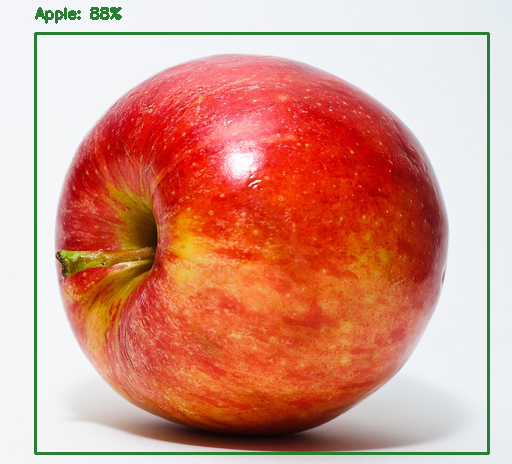

In [7]:
#@title Run object detection and show the detection results

INPUT_IMAGE_URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Red_Apple.jpg/1200px-Red_Apple.jpg" #@param {type:"string"}
DETECTION_THRESHOLD = 0.3 #@param {type:"number"}

TEMP_FILE = '/tmp/image.png'

!wget -q -O $TEMP_FILE $INPUT_IMAGE_URL
im = Image.open(TEMP_FILE)
im.thumbnail((512, 512), Image.ANTIALIAS)
im.save(TEMP_FILE, 'PNG')

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Run inference and draw detection result on the local copy of the original file
detection_result_image = run_odt_and_draw_results(
    TEMP_FILE,
    interpreter,
    threshold=DETECTION_THRESHOLD
)

# Show the detection result
Image.fromarray(detection_result_image)